# EDA

In this notebook we will explore and clean our data. We will be looking for the following things:

- Initial Cleaning
- Exploration and visualization 
- Data Wrangling 

Our aim here is to better understand our data and see how we can best use it to predict game outcomes. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("games.csv", index_col="gameId")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,gameType,seasonId,gameVersion,mapId,gameMode,team100_ban_1,team100_ban_2,team100_ban_3,team100_ban_4,team100_ban_5,team200_ban_6,team200_ban_7,team200_ban_8,team200_ban_9,team200_ban_10,teamId_participant0,championId_participant0,spell1Id_participant0,spell2Id_participant0,role_participant0,lane_participant0,perk0_participant0,perk1_participant0,perk2_participant0,perk3_participant0,perk4_participant0,perkPrimaryStyle_participant0,perkSubStyle_participant0,statPerk0_participant0,statPerk1_participant0,statPerk2_participant0,teamId_participant1,championId_participant1,spell1Id_participant1,spell2Id_participant1,role_participant1,lane_participant1,perk0_participant1,perk1_participant1,perk2_participant1,perk3_participant1,perk4_participant1,perkPrimaryStyle_participant1,perkSubStyle_participant1,statPerk0_participant1,statPerk1_participant1,statPerk2_participant1,teamId_participant2,championId_participant2,spell1Id_participant2,spell2Id_participant2,role_participant2,lane_participant2,perk0_participant2,perk1_participant2,perk2_participant2,perk3_participant2,perk4_participant2,perkPrimaryStyle_participant2,perkSubStyle_participant2,statPerk0_participant2,statPerk1_participant2,statPerk2_participant2,teamId_participant3,championId_participant3,spell1Id_participant3,spell2Id_participant3,role_participant3,lane_participant3,perk0_participant3,perk1_participant3,perk2_participant3,perk3_participant3,perk4_participant3,perkPrimaryStyle_participant3,perkSubStyle_participant3,statPerk0_participant3,statPerk1_participant3,statPerk2_participant3,teamId_participant4,championId_participant4,spell1Id_participant4,spell2Id_participant4,role_participant4,lane_participant4,perk0_participant4,perk1_participant4,perk2_participant4,perk3_participant4,perk4_participant4,perkPrimaryStyle_participant4,perkSubStyle_participant4,statPerk0_participant4,statPerk1_participant4,statPerk2_participant4,teamId_participant5,championId_participant5,spell1Id_participant5,spell2Id_participant5,role_participant5,lane_participant5,perk0_participant5,perk1_participant5,perk2_participant5,perk3_participant5,perk4_participant5,perkPrimaryStyle_participant5,perkSubStyle_participant5,statPerk0_participant5,statPerk1_participant5,statPerk2_participant5,teamId_participant6,championId_participant6,spell1Id_participant6,spell2Id_participant6,role_participant6,lane_participant6,perk0_participant6,perk1_participant6,perk2_participant6,perk3_participant6,perk4_participant6,perkPrimaryStyle_participant6,perkSubStyle_participant6,statPerk0_participant6,statPerk1_participant6,statPerk2_participant6,teamId_participant7,championId_participant7,spell1Id_participant7,spell2Id_participant7,role_participant7,lane_participant7,perk0_participant7,perk1_participant7,perk2_participant7,perk3_participant7,perk4_participant7,perkPrimaryStyle_participant7,perkSubStyle_participant7,statPerk0_participant7,statPerk1_participant7,statPerk2_participant7,teamId_participant8,championId_participant8,spell1Id_participant8,spell2Id_participant8,role_participant8,lane_participant8,perk0_participant8,perk1_participant8,perk2_participant8,perk3_participant8,perk4_participant8,perkPrimaryStyle_participant8,perkSubStyle_participant8,statPerk0_participant8,statPerk1_participant8,statPerk2_participant8,teamId_participant9,championId_participant9,spell1Id_participant9,spell2Id_participant9,role_participant9,lane_participant9,perk0_participant9,perk1_participant9,perk2_participant9,perk3_participant9,perk4_participant9,perkPrimaryStyle_participant9,perkSubStyle_participant9,statPerk0_participant9,statPerk1_participant9,statPerk2_participant9,win
gameId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5030880353,MATCHED_GAME,13,11.1.352.5559,11,CLASSIC,360.0,131.0,141.0,25.0,84.0,92.0,350.0,120.0,28.0,53.0,100,238,4,14,NaN,NaN,8112,8143,8138,8106,9111,8100,8000,5008,5008,5002,100,122,

In [5]:
df.describe()

,seasonId,mapId,team100_ban_1,team100_ban_2,team100_ban_3,team100_ban_4,team100_ban_5,team200_ban_6,team200_ban_7,team200_ban_8,team200_ban_9,team200_ban_10,teamId_participant0,championId_participant0,spell1Id_participant0,spell2Id_participant0,role_participant0,lane_participant0,perk0_participant0,perk1_participant0,perk2_participant0,perk3_participant0,perk4_participant0,perkPrimaryStyle_participant0,perkSubStyle_participant0,statPerk0_participant0,statPerk1_participant0,statPerk2_participant0,teamId_participant1,championId_participant1,spell1Id_participant1,spell2Id_participant1,role_participant1,lane_participant1,perk0_participant1,perk1_participant1,perk2_participant1,perk3_participant1,perk4_participant1,perkPrimaryStyle_participant1,perkSubStyle_participant1,statPerk0_participant1,statPerk1_participant1,statPerk2_participant1,teamId_participant2,championId_participant2,spell1Id_participant2,spell2Id_participant2,role_participant2,lane_participant2,perk0_participant2,perk1_participant2,perk2_participant2,perk3_participant2,perk4_participant2,perkPrimaryStyle_participant2,perkSubStyle_participant2,statPerk0_participant2,statPerk1_participant2,statPerk2_participant2,teamId_participant3,championId_participant3,spell1Id_participant3,spell2Id_participant3,role_participant3,lane_participant3,perk0_participant3,perk1_participant3,perk2_participant3,perk3_participant3,perk4_participant3,perkPrimaryStyle_participant3,perkSubStyle_participant3,statPerk0_participant3,statPerk1_participant3,statPerk2_participant3,teamId_participant4,championId_participant4,spell1Id_participant4,spell2Id_participant4,role_participant4,lane_participant4,perk0_participant4,perk1_participant4,perk2_participant4,perk3_participant4,perk4_participant4,perkPrimaryStyle_participant4,perkSubStyle_participant4,statPerk0_participant4,statPerk1_participant4,statPerk2_participant4,teamId_participant5,championId_participant5,spell1Id_participant5,spell2Id_participant5,role_participant5,lane_participant5,perk0_participant5,perk1_participant5,perk2_participant5,perk3_participant5,perk4_participant5,perkPrimaryStyle_participant5,perkSubStyle_participant5,statPerk0_participant5,statPerk1_participant5,statPerk2_participant5,teamId_participant6,championId_participant6,spell1Id_participant6,spell2Id_participant6,role_participant6,lane_participant6,perk0_participant6,perk1_participant6,perk2_participant6,perk3_participant6,perk4_participant6,perkPrimaryStyle_participant6,perkSubStyle_participant6,statPerk0_participant6,statPerk1_participant6,statPerk2_participant6,teamId_participant7,championId_participant7,spell1Id_participant7,spell2Id_participant7,role_participant7,lane_participant7,perk0_participant7,perk1_participant7,perk2_participant7,perk3_participant7,perk4_participant7,perkPrimaryStyle_participant7,perkSubStyle_participant7,statPerk0_participant7,statPerk1_participant7,statPerk2_participant7,teamId_participant8,championId_participant8,spell1Id_participant8,spell2Id_participant8,role_participant8,lane_participant8,perk0_participant8,perk1_participant8,perk2_participant8,perk3_participant8,perk4_participant8,perkPrimaryStyle_participant8,perkSubStyle_participant8,statPerk0_participant8,statPerk1_participant8,statPerk2_participant8,teamId_participant9,championId_participant9,spell1Id_participant9,spell2Id_participant9,role_participant9,lane_participant9,perk0_participant9,perk1_participant9,perk2_participant9,perk3_participant9,perk4_participant9,perkPrimaryStyle_participant9,perkSubStyle_participant9,statPerk0_participant9,statPerk1_participant9,statPerk2_participant9,win
count,183.0,183.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,183.0,183.000000,183.000000,183.000000,0.0,0.0,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.0,183.000000,183.000000,183.000000,0.0,0.0,183.000000,183.000000,183.000000,183.000000,183.000000,183.000

 # Initial Cleaning 

We can see that some of our column contain purely null values (i.e "role_participant0", "lane_participant0" etc.), these columns are due to certain legacy in game features that the API still accounts for. However, for our season (season 13) it's irrelevant and so it's safe to drop them.

We can also see that some columns have 0 standard deviation (i.e "seasonId", "teamId_participant0" etc.), these columns are all identical. This means they won't be much use for our model and so it is also safe to drop them.

In [6]:
df.drop(columns=["role_participant0", "lane_participant0", "role_participant1", "lane_participant1", 
                "role_participant2", "lane_participant2", "role_participant3", "lane_participant3", 
                "role_participant4", "lane_participant4", "role_participant5", "lane_participant5", 
                "role_participant6", "lane_participant6", "role_participant7", "lane_participant7", 
                "role_participant8", "lane_participant8", "role_participant9", "lane_participant9", ], inplace=True)

df.drop(columns=["seasonId", "teamId_participant0", "teamId_participant1", "teamId_participant2", 
                 "teamId_participant3", "teamId_participant4", "teamId_participant5", "teamId_participant6",
                 "teamId_participant7", "teamId_participant8", "teamId_participant9"], inplace=True)

Now we will look for any null values in our data.

In [7]:
df.isnull().sum()

gameType                         0
gameVersion                      0
mapId                            0
gameMode                         0
team100_ban_1                    8
team100_ban_2                    8
team100_ban_3                    8
team100_ban_4                    8
team100_ban_5                    8
team200_ban_6                    8
team200_ban_7                    8
team200_ban_8                    8
team200_ban_9                    8
team200_ban_10                   8
championId_participant0          0
spell1Id_participant0            0
spell2Id_participant0            0
perk0_participant0               0
perk1_participant0               0
perk2_participant0               0
perk3_participant0               0
perk4_participant0               0
perkPrimaryStyle_participant0    0
perkSubStyle_participant0        0
statPerk0_participant0           0
statPerk1_participant0           0
statPerk2_participant0           0
championId_participant1          0
spell1Id_participant

We can see that we have several null values in the team bans. That's because in League of Legends banning is optional and sometimes players forget or prefer not to ban any character. We can't simply drop this data as it might be of value for predicting game outcomes, so we will replace the null values with "None".

In [8]:
df.fillna("None", inplace=True)

# Exploration and visualization

Now we will begin to explore our data. We will try to look for interesting patterns and get a direction into what factors are more relevant and just how relevant they are. We will also try to see what transformations we should perform on our data to make our models as accurate as possible. 

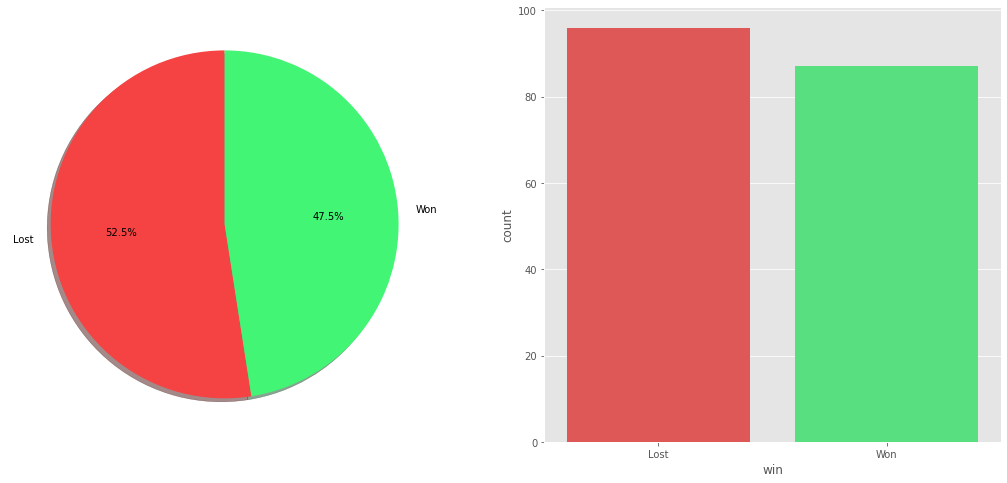

In [9]:
labels = ["Lost", "Won"]
colors = ["#f54242", "#42f575"]

f, ax=plt.subplots(1,2,figsize=(18,8))
df['win'].value_counts().plot.pie(labels=labels, colors=colors, autopct='%1.1f%%', ax=ax[0], shadow=True, startangle=90)
ax[0].set_ylabel('')

sns.countplot('win', data=df, palette=(colors), ax=ax[1]).set_xticklabels(["Lost", "Won"])

plt.show()

We can see that most of the games were lost ... unfortunately :( 

# Data Wrangling

In [10]:
df.dtypes

gameType                         object
gameVersion                      object
mapId                             int64
gameMode                         object
team100_ban_1                    object
team100_ban_2                    object
team100_ban_3                    object
team100_ban_4                    object
team100_ban_5                    object
team200_ban_6                    object
team200_ban_7                    object
team200_ban_8                    object
team200_ban_9                    object
team200_ban_10                   object
championId_participant0           int64
spell1Id_participant0             int64
spell2Id_participant0             int64
perk0_participant0                int64
perk1_participant0                int64
perk2_participant0                int64
perk3_participant0                int64
perk4_participant0                int64
perkPrimaryStyle_participant0     int64
perkSubStyle_participant0         int64
statPerk0_participant0            int64


In [11]:
df["mapId"] = df["mapId"].astype(object)
df.iloc[17:-1] = df.iloc[15:-1].astype(object)

In [12]:
df = pd.get_dummies(df.iloc[:-2])

In [13]:
df.drop(["win_1"], axis=1, inplace=True)

In [14]:
df.head()

gameType_MATCHED_GAME  gameVersion_10.25.350.1724  \
gameId                                                          
5030880353                      1                           0   
5030907800                      1                           0   
5030866370                      1                           0   
5030912328                      1                           0   
5030831079                      1                           0   

            gameVersion_11.1.351.8352  gameVersion_11.1.352.5559  \
gameId                                                             
5030880353                          0                          1   
5030907800                          0                          1   
5030866370                          0                          1   
5030912328                          0                          1   
5030831079                          0                          1   

            gameVersion_11.2.353.8505  mapId_11  mapId_12  gameMode_ARAM  \
gameId                                                                     
5030880353                          0         1         0              0   
5030907800                          0         1         0              0   
5030866370                          0         1         0              0   
5030912328                          0         1         0              0   
5030831079                          0         1         0              0   

            gameMode_CLASSIC  team100_ban_1_-1.0  team100_ban_1_1.0  \
gameId                                                                
5030880353                 1                   0                  0   
5030907800                 1                   0                  0   
5030866370                 1                   0                  0   
5030912328                 1                   0                  0   
5030831079                 1                   0                  0   

            team100_ban_1_2.0  team100_ban_1_8.0  team100_ban_1_10.0  \
gameId                                                                 
5030880353                  0                  0                   0   
5030907800                  0                  0                   0   
5030866370                  0                  0                   0   
5030912328                  0                  0                   0   
5030831079                  0                  0                   0   

            team100_ban_1_11.0  team100_ban_1_12.0  team100_ban_1_17.0  \
gameId                                                                   
5030880353                   0                   0                   0   
5030907800                   1                   0                   0   
5030866370                   0                   0                   0   
5030912328                   0                   0                   0   
5030831079                   0                   0                   0   

            team100_ban_1_18.0  team100_ban_1_21.0  team100_ban_1_24.0  \
gameId                                                                   
5030880353                   0                   0                   0   
5030907800                   0                   0                   0   
5030866370                   0                   0                   0   
5030912328                   0                   0                   0   
5030831079                   0                   0                   0   

            team100_ban_1_25.0  team100_ban_1_28.0  team100_ban_1_33.0  \
gameId                                                                   
5030880353                   0                   0                   0   
5030907800                   0                   0                   0   
5030866370                   0                   0                   0   
5030912328                   0                   1                   0   
5030831079                   0                   0           

In [15]:
df.to_csv("games_cleaned.csv", index=False)